Datasets Used

https://ec.europa.eu/eurostat/databrowser/view/ten00117/default/table?lang=en

### Electricity analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

In [2]:
def kwh_cost_graph(country, type_of_consumer):
    df= pd.read_csv('Electricity prices by type of user.csv')
    df = df[df['geo'] == country]
    df = df[df['indic_en'] == type_of_consumer]
    df.reset_index(inplace=True)
    df.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 'product','indic_en', 'currency','unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
    df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
    df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
    df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)
    rcParams['figure.figsize'] = 20, 12
    df.plot(x = 'time', y = 'value')
    plt.xlabel('Date')
    plt.ylabel('EUR')
    plt.title("Price per KWH")

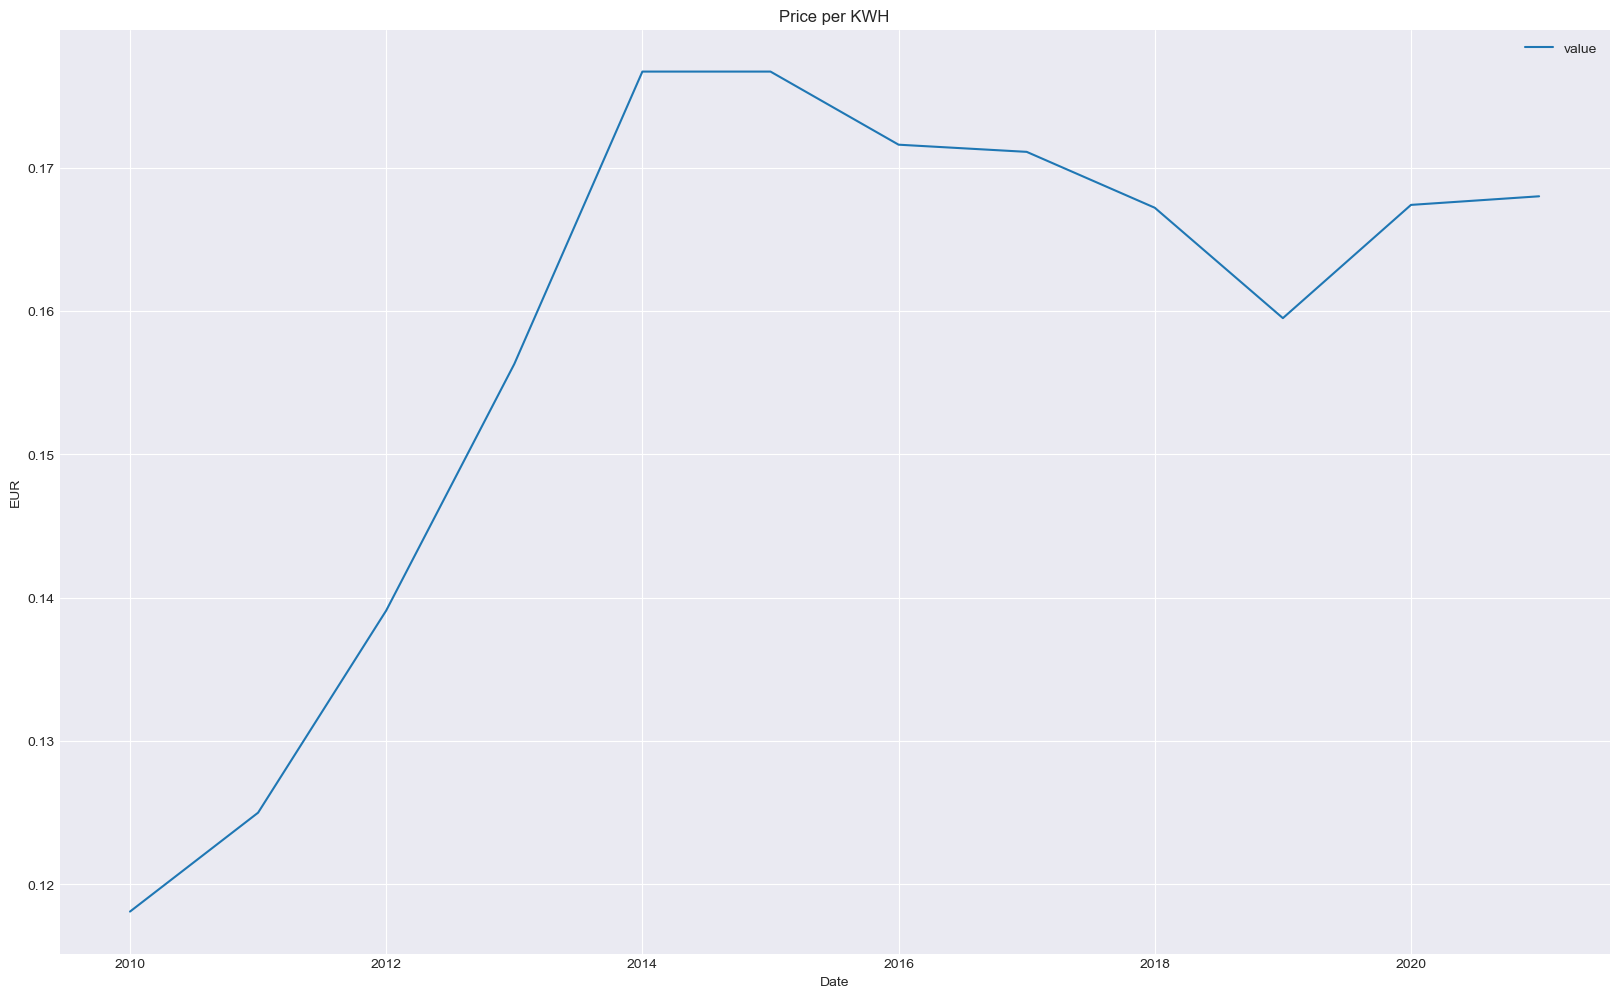

In [3]:
#MSHH stands for Medium size households
kwh_cost_graph('EL', 'MSHH')

Υπάρχει αύξηση της τάξης του 50% από το 2010 μέχρι το 2014. Μετά επικρατεί μια σχετικά σταθερή τιμή που κυμαίνεται από τα 0.16 με 0.17 ευρώ.

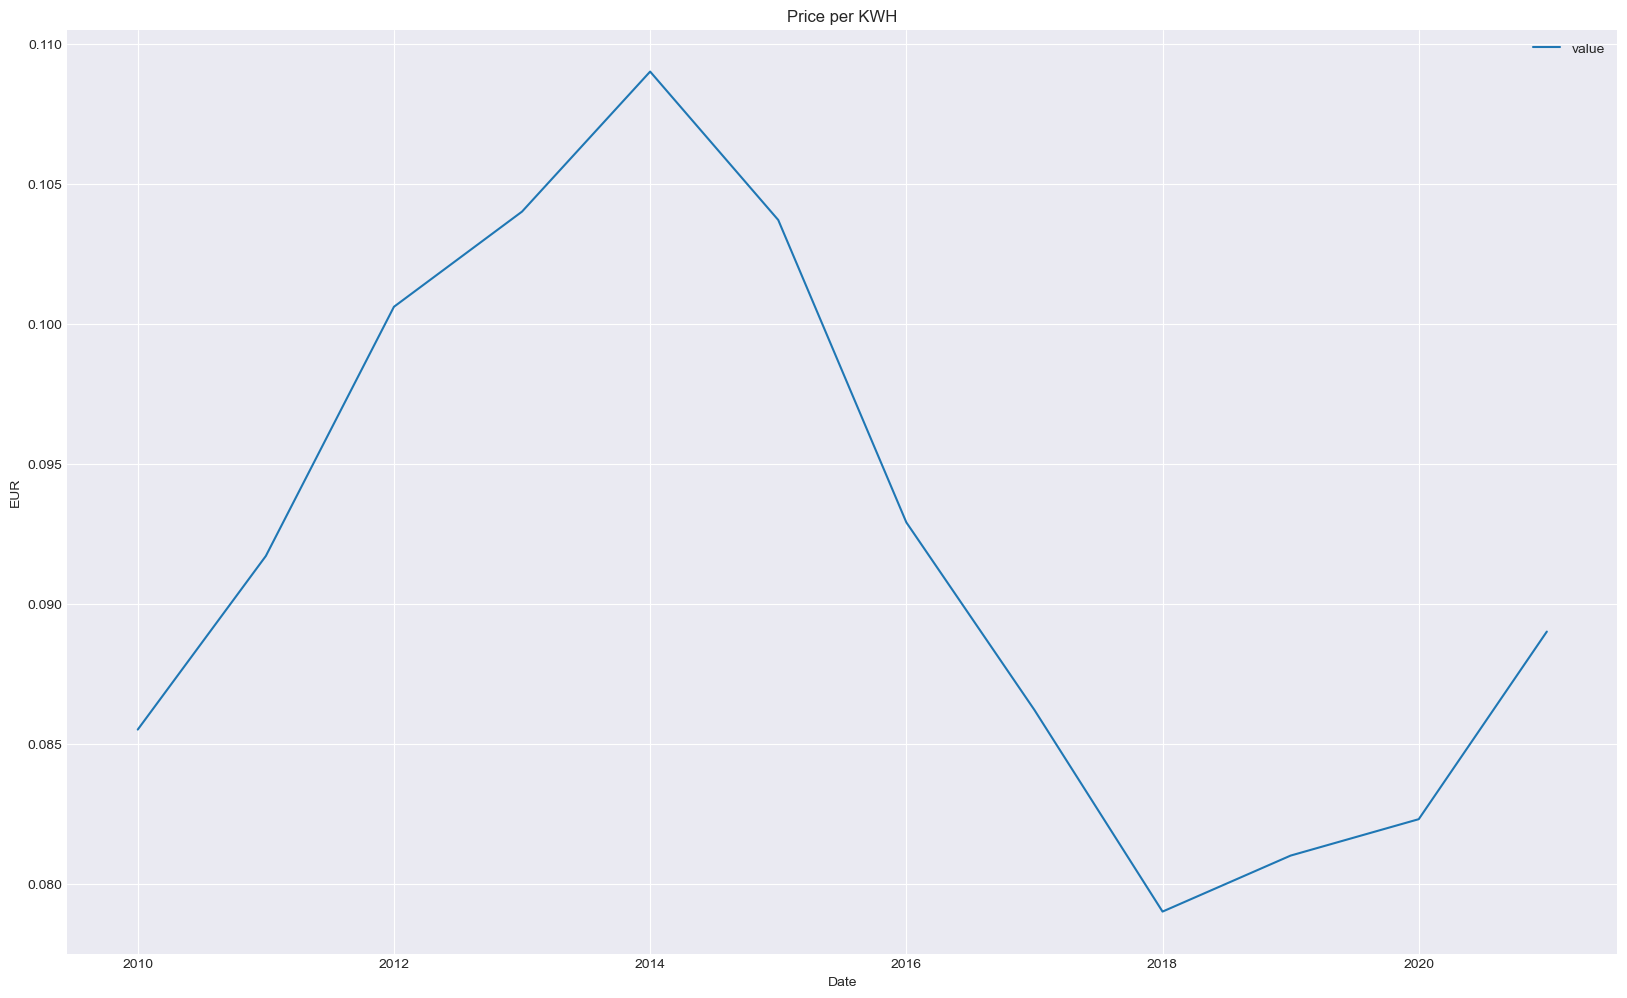

In [4]:
#MSIND stands for Non-household, medium size consumers
kwh_cost_graph('EL', 'MSIND')

### Natural Gas

In [5]:
df= pd.read_csv('natural gas - monthly prices.csv')
df

Month  Price   Change
0    Oct 1998   1.60        -
1    Nov 1998   1.80   12.92%
2    Dec 1998   1.49  -17.60%
3    Jan 1999   1.60    7.88%
4    Feb 1999   1.58   -1.44%
..        ...    ...      ...
281  Mar 2022   4.43    7.79%
282  Apr 2022   6.04   36.27%
283  May 2022   7.70   27.61%
284  Jun 2022   7.26   -5.76%
285  Jul 2022   7.14   -1.60%

[286 rows x 3 columns]

In [6]:
df['Date'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df

Month  Price   Change       Date
0    Oct 1998   1.60        - 1998-10-01
1    Nov 1998   1.80   12.92% 1998-11-01
2    Dec 1998   1.49  -17.60% 1998-12-01
3    Jan 1999   1.60    7.88% 1999-01-01
4    Feb 1999   1.58   -1.44% 1999-02-01
..        ...    ...      ...        ...
281  Mar 2022   4.43    7.79% 2022-03-01
282  Apr 2022   6.04   36.27% 2022-04-01
283  May 2022   7.70   27.61% 2022-05-01
284  Jun 2022   7.26   -5.76% 2022-06-01
285  Jul 2022   7.14   -1.60% 2022-07-01

[286 rows x 4 columns]

In [7]:
df.drop(['Month'], inplace=True, axis=1)
df

Price   Change       Date
0     1.60        - 1998-10-01
1     1.80   12.92% 1998-11-01
2     1.49  -17.60% 1998-12-01
3     1.60    7.88% 1999-01-01
4     1.58   -1.44% 1999-02-01
..     ...      ...        ...
281   4.43    7.79% 2022-03-01
282   6.04   36.27% 2022-04-01
283   7.70   27.61% 2022-05-01
284   7.26   -5.76% 2022-06-01
285   7.14   -1.60% 2022-07-01

[286 rows x 3 columns]

In [8]:
fig = px.line(df, x="Date", y="Price", title="Euro per Million Metric British Thermal Unit")
fig.update_traces(mode="markers+lines")
fig.show()

Text(0.5, 1.0, 'Euro per Million Metric British Thermal Unit')

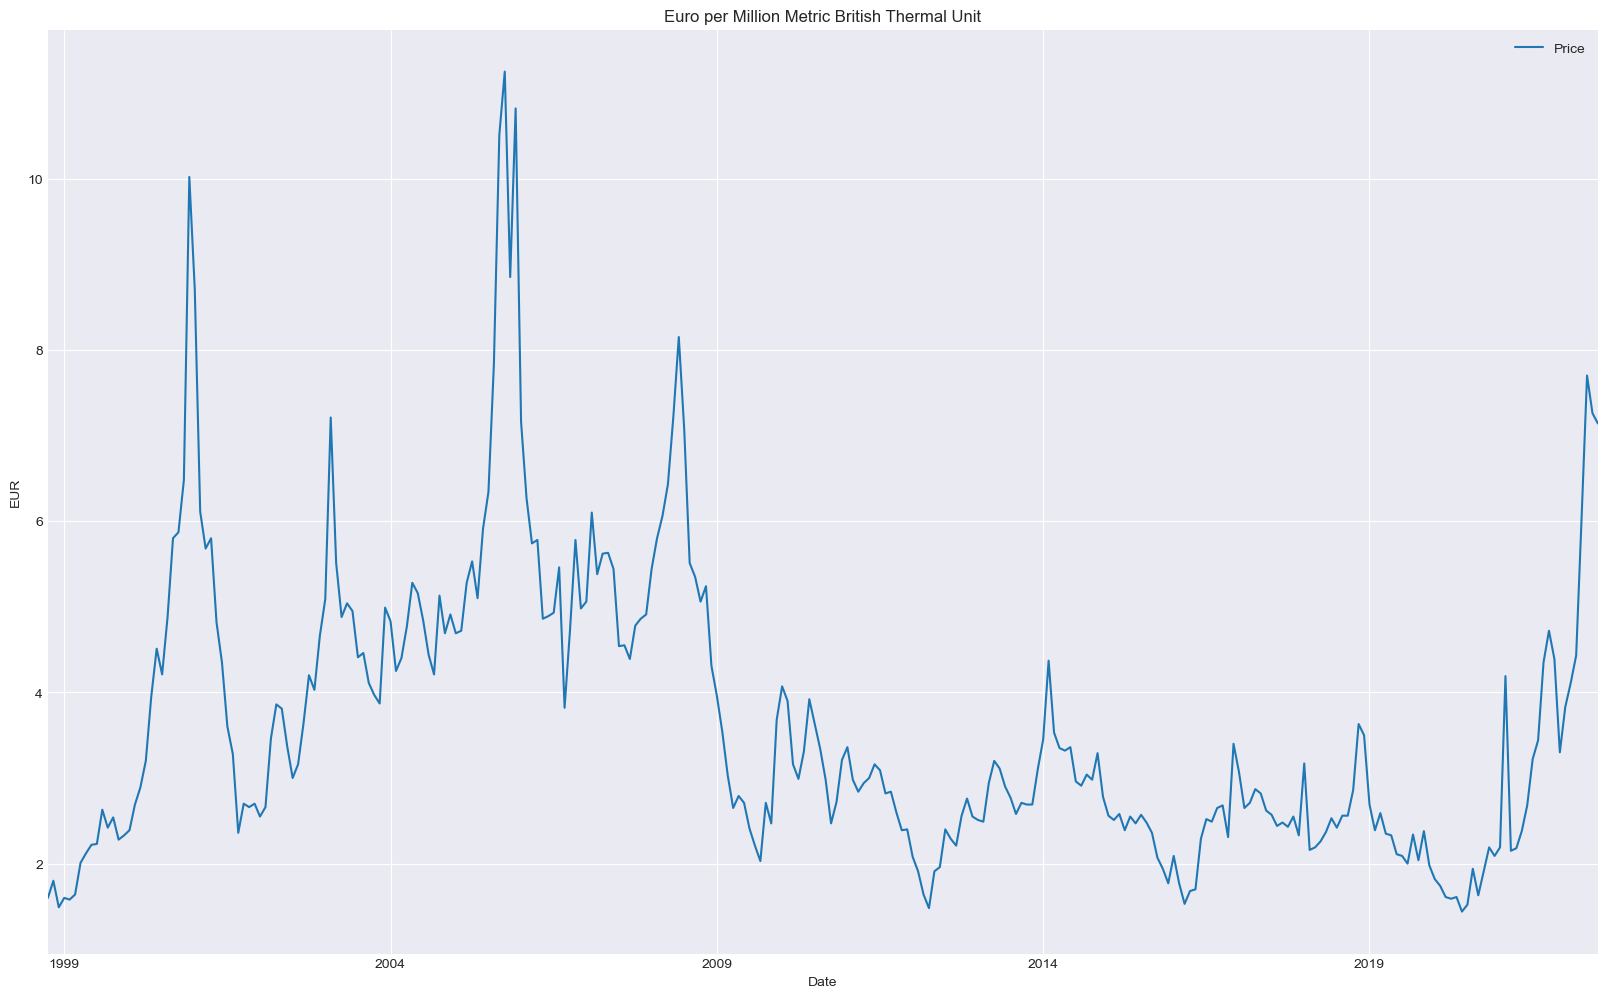

In [9]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Price')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.title("Euro per Million Metric British Thermal Unit")

Υπάρχουν υψηλές τιμές στα πρώτα έτη της δεκαετίας το 10. Ωστοσό, από τα τέλη και μετά οι τιμή είναι ιδιαίτερα χαμηλή για μια ολόκληρη δεκαετία. Από την άνοιξη του 2021, δηλαδή από τα τέλη της δεύτερης καραντίνας που υπήρχε λόγω του κορονοϊού, παρατηρείται ραγδαία αύξηση στην τιμή.

In [10]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [11]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)/100

Text(0.5, 1.0, 'Price change percentage through time')

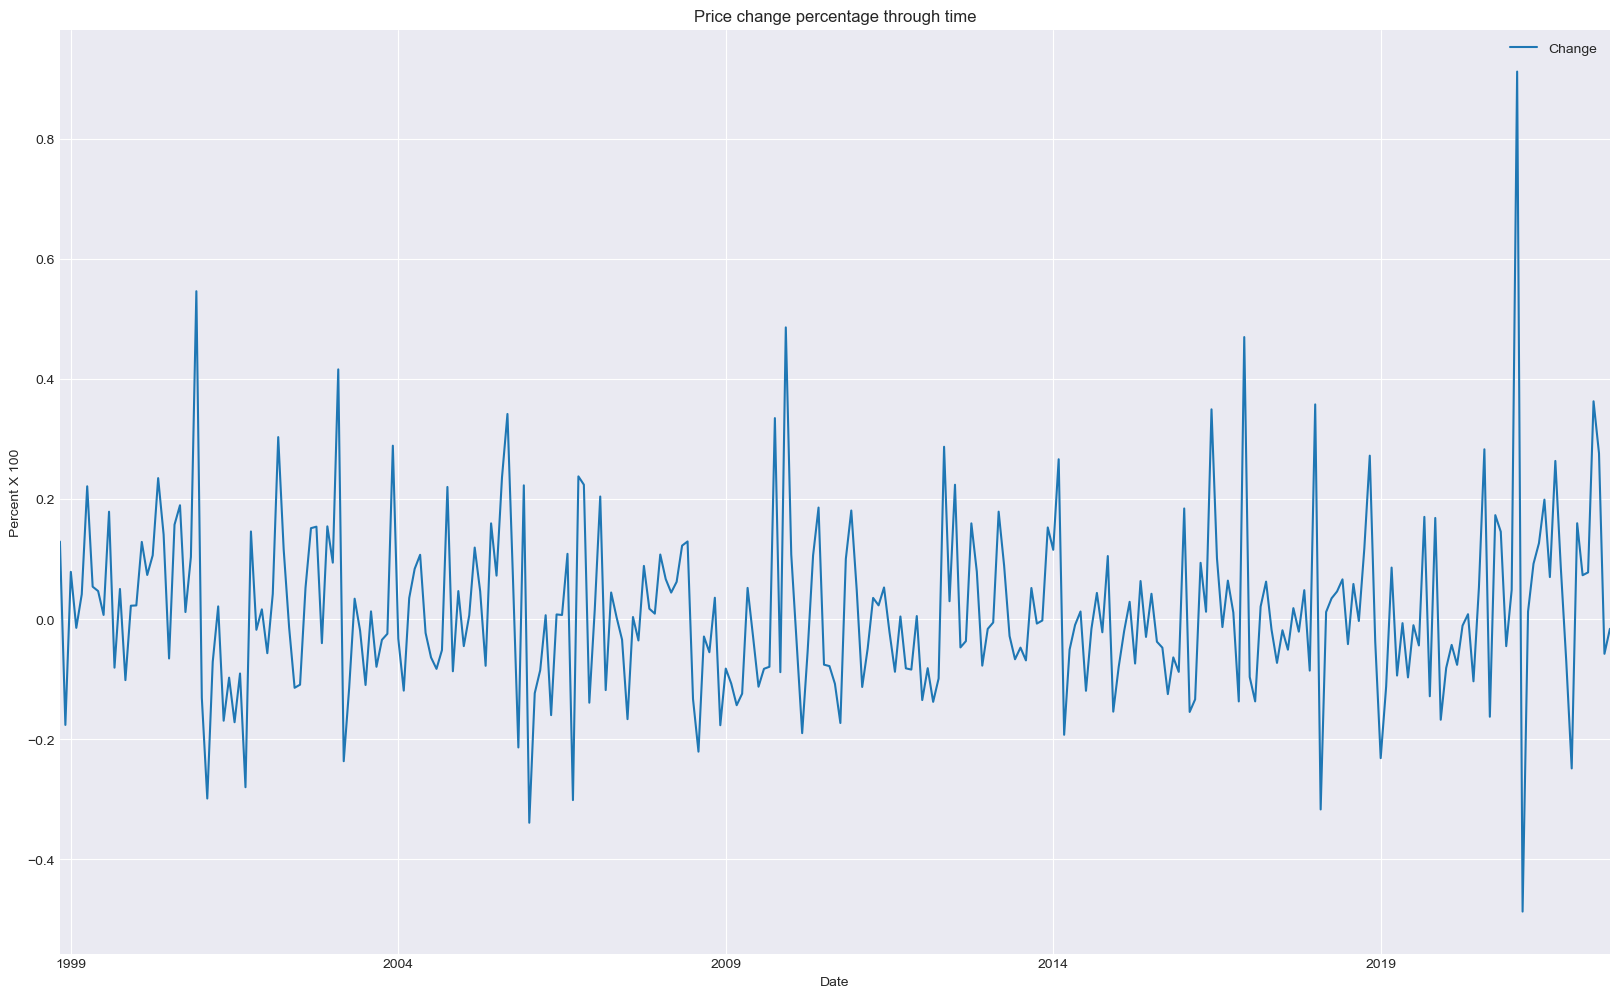

In [12]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percent X 100')
plt.title("Price change percentage through time")

### Diesel

In [13]:
df= pd.read_csv('diesel price - monthly data.csv')
df

Month  Price   Change
0    Jun 2006   1.65        -
1    Jul 2006   1.75    5.74%
2    Aug 2006   1.75    0.34%
3    Sep 2006   1.42  -18.92%
4    Oct 2006   1.42    0.03%
..        ...    ...      ...
189  Mar 2022   3.43   35.47%
190  Apr 2022   3.74    8.90%
191  May 2022   4.40   17.67%
192  Jun 2022   4.13   -6.10%
193  Jul 2022   3.64  -11.91%

[194 rows x 3 columns]

In [14]:
df['Date'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df.drop(['Month'], inplace=True, axis=1)

In [15]:
fig = px.line(df, x="Date", y="Price", title="Price per Gallon")
fig.update_traces(mode="markers+lines")
fig.show()

Text(0.5, 1.0, 'Price per Gallon')

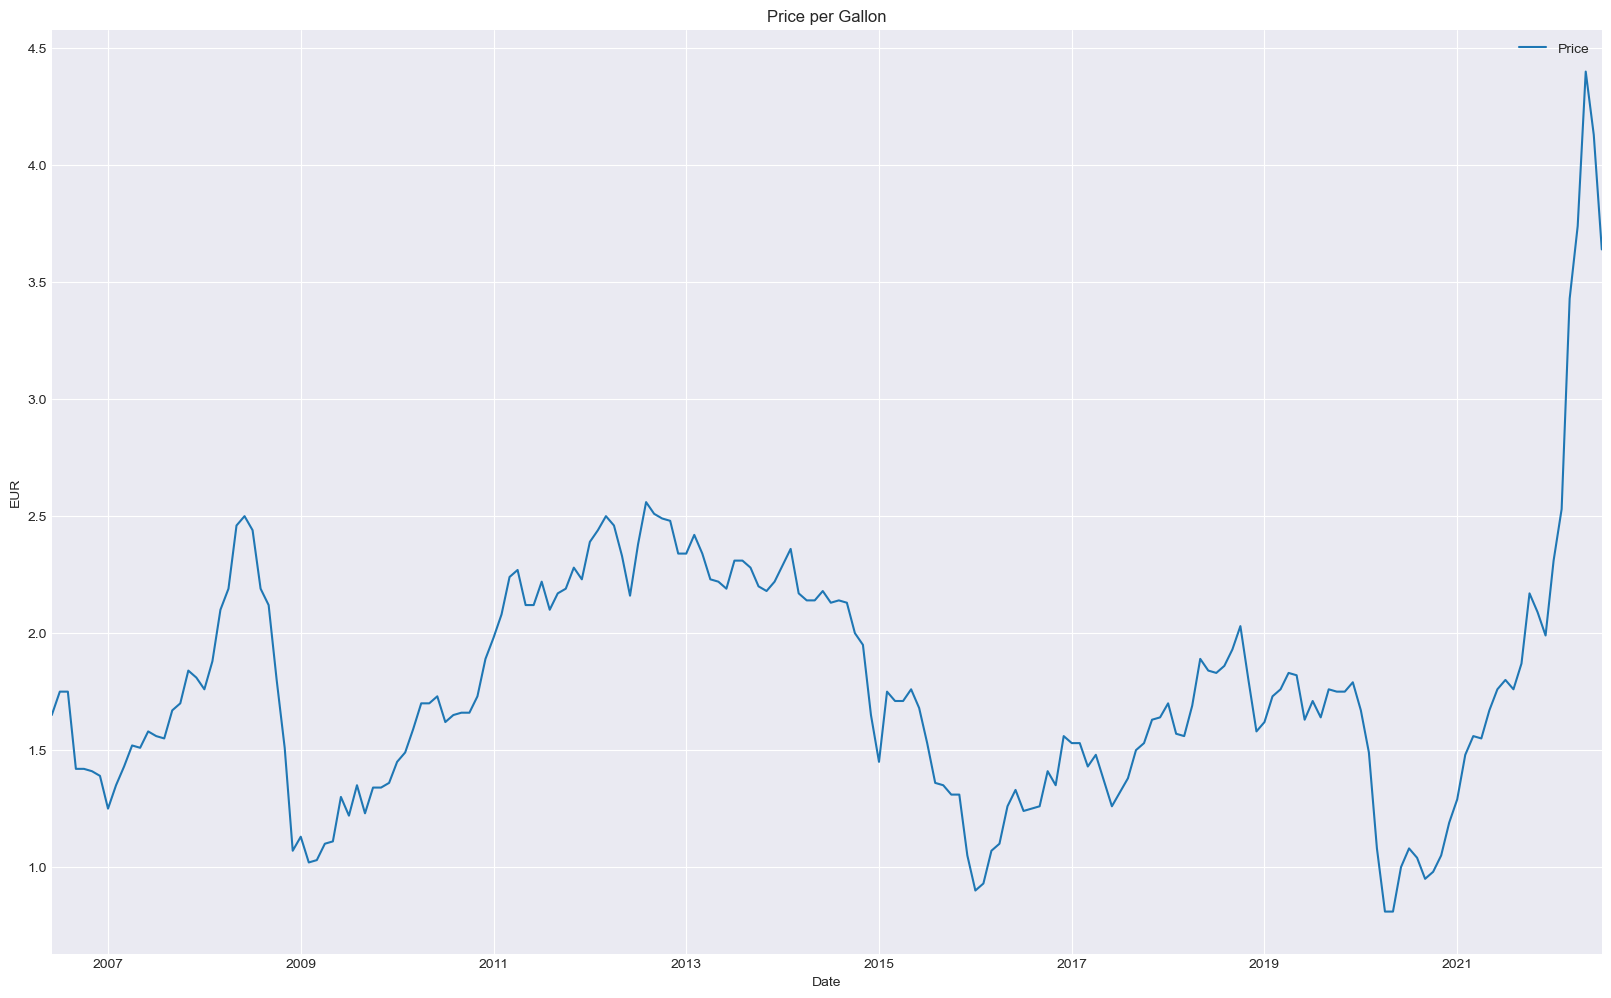

In [16]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Price')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.title("Price per Gallon")

Σημειώνεται μια κατηφορική πτώση από το καλοκαίρι του 2008 μέχρι το τέλος του έτους, η οποία συνοδεύεται από σταδιακή αύξηση της τιμής μέχρι το τέλος του 2012. Έπειτα ακολουθεί πτώση μέχρι τις αρχές του 2016, ενώ η τιμή αυξάνεται σταδιακά με συνεχής αυξομειώσεις μέχρι το τέλος του 2019. Έπειτα στην περίοδο της πρώτης καραντίνας, η τιμή μειώνεται στο 50%, όμως απο εκεί και πέρα υπάρχει συνεχόμενη αύξηση σε τιμές εκτός των συνηθησμένων ορίων.

In [17]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [18]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)

Text(0.5, 1.0, 'Price change percentage through time')

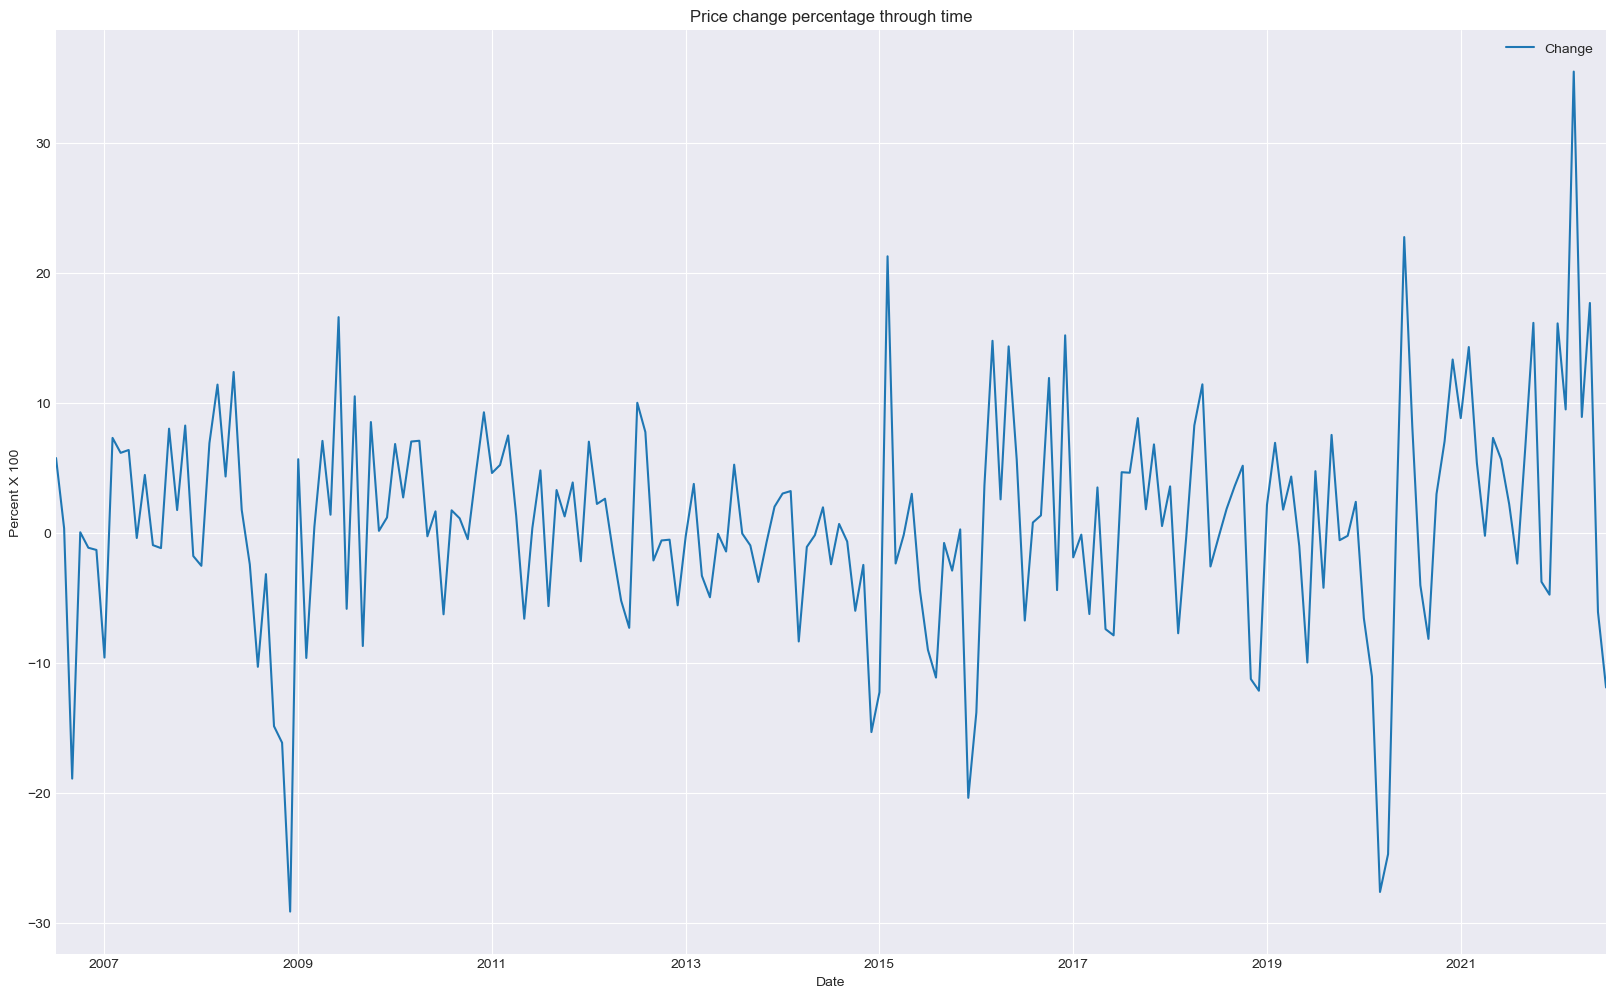

In [19]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percent X 100')
plt.title("Price change percentage through time")

### Commodity Energy Price Index

In [20]:
df = pd.read_csv('Commodity Fuel (energy) Index Monthly Price.csv')
df

Month   Price  Change
0    Aug 1992   27.00       -
1    Sep 1992   28.05   3.87%
2    Oct 1992   28.02  -0.08%
3    Nov 1992   26.40  -5.79%
4    Dec 1992   25.28  -4.23%
..        ...     ...     ...
355  Mar 2022  163.19  24.31%
356  Apr 2022  153.19  -6.13%
357  May 2022  160.58   4.83%
358  Jun 2022  170.72   6.31%
359  Jul 2022  168.76  -1.15%

[360 rows x 3 columns]

In [21]:
df['Date'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df.drop(['Month'], inplace=True, axis=1)

In [22]:
fig = px.line(df, x="Date", y="Price", title="Commodity Energy Index through time")
fig.update_traces(mode="markers+lines")
fig.show()

Text(0.5, 1.0, 'Commodity Energy Index through time')

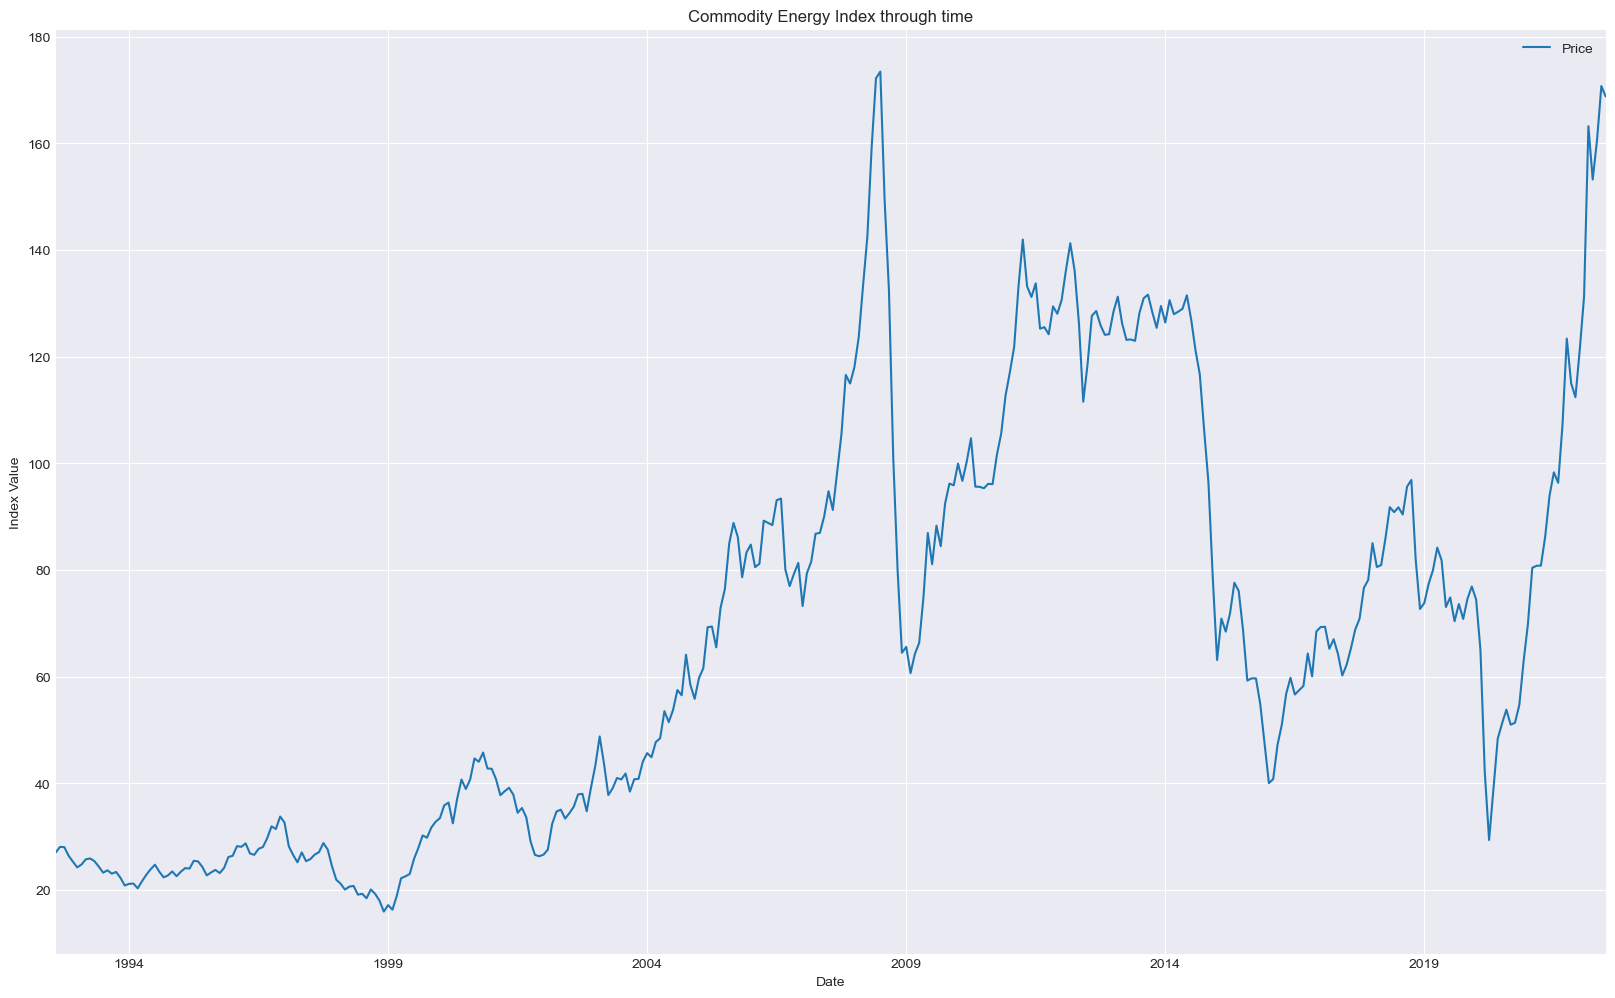

In [23]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Price')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title("Commodity Energy Index through time")

Με συνεχείς αυξομειώσεις, υπάρχει σταδική αύξηση του δείκτη έως το καλοκαίρι του 2008, η οποία συνοδεύεται από μια απότομη μείωση που ρίχνει την τιμή του δείκτη σε φυσιολογικά για τότε πεδία. Έπειτα, υπάρχει σταδιακή αύξηση μέχρι την άνοιξη του 2011, όπου μετά από μερικές αυξομειώσεις, η τιμή δείχνει να σταθεροποιείται. Από το καλοκαίρι του 2014 και μετά, σημειώνεται απότομη μείωση στο 30% της τιμής λόγω της γενικής οικονομικής κρίσης της περιόδου αυτής. Μετά υπάρχει μια αυξομείωσει που έχει ανότατο όριο τον Οκτώβριο του 2018, και κατότατο τον Απρίλη του 2020. Δηλαδή η έξαρση του κορονοϊού έριξε την τιμή του δείκτη. Από και μετά όμως, μέχρι σήμερα σημειώνεται αύξηση της τάξης του 450%!!!

In [24]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [25]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)

Text(0.5, 1.0, 'Price change percentage through time')

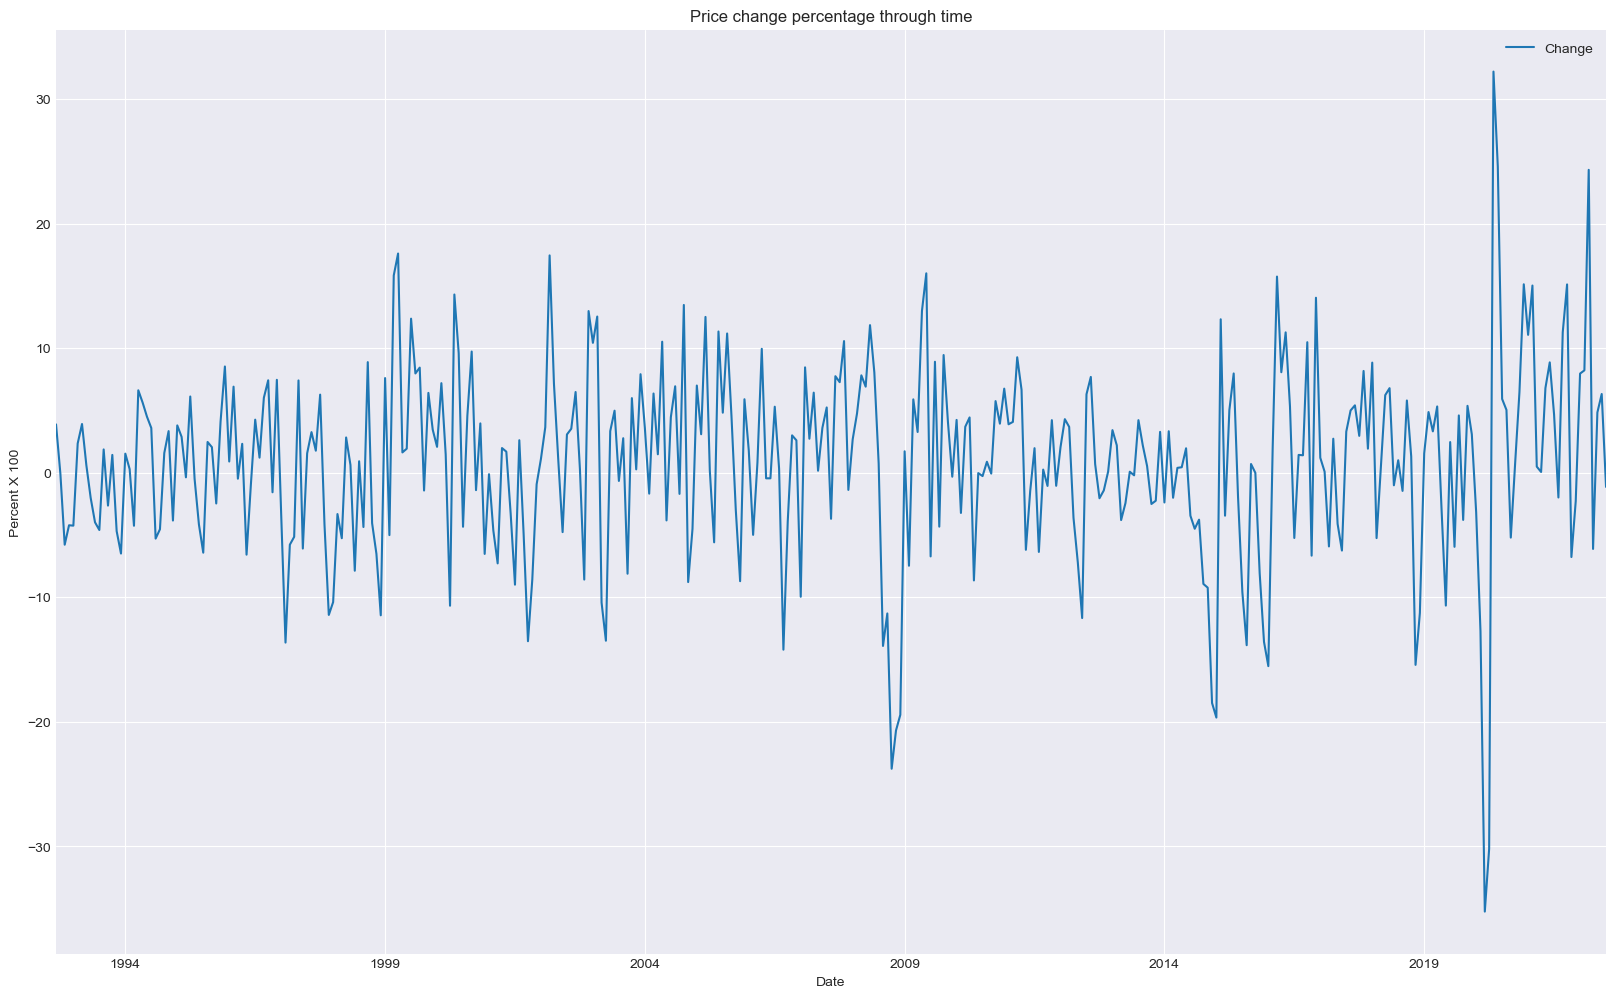

In [26]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percent X 100')
plt.title("Price change percentage through time")